`63070501061 S.RAKNA`

> 10 points. 1 hrs. 

# KNN (K nearest neighbor) for 3 Classes
Modify the provided program for KNN with 2 random red/blue classes shown in class to have **3 classes of red/blue/yellow** instead. Then use **K = 4** to classify a randomly generated sample as red, yellow, or blue.

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#Create Training

In [2]:
# Feature set containing 25 * 2 for 80 (x,y) values of known/training data that are random integers 0-99
trainData = np.random.randint(0, 100, (80, 2)).astype(np.float32)
# Label each one either Red or Blue with numbers 0 and 1. Response is a random integers 0-1 of 80 * 1 values
responses = np.random.randint(0, 3, (80, 1)).astype(
    np.float32)  # responses 25 x 1 matrix


In [3]:
print ("Training Data:\n", trainData)
print("\n Responses:\n", responses)
print("Responses Ravel or flattened as 1-D:\n", responses.ravel()) #Method .ravel flattens the np array to 1-D. 
print("Red Responses: \n ", responses.ravel()== 0) #color 0 is "Red", color 1 is blue

Training Data:
 [[80. 92.]
 [47. 33.]
 [24. 64.]
 [65.  9.]
 [26. 88.]
 [56. 55.]
 [17. 74.]
 [14. 97.]
 [59. 67.]
 [44. 29.]
 [23.  9.]
 [31. 99.]
 [31. 42.]
 [69. 88.]
 [ 5. 11.]
 [88. 64.]
 [50. 57.]
 [82. 55.]
 [70. 23.]
 [28. 71.]
 [66. 68.]
 [ 3. 51.]
 [54. 48.]
 [76. 29.]
 [81.  4.]
 [65. 43.]
 [68. 30.]
 [94. 90.]
 [53. 38.]
 [67. 36.]
 [22. 42.]
 [17. 38.]
 [62. 63.]
 [29. 53.]
 [29. 96.]
 [65. 26.]
 [22. 64.]
 [39. 98.]
 [82. 76.]
 [35. 46.]
 [67. 97.]
 [83. 59.]
 [52. 78.]
 [21. 99.]
 [26. 67.]
 [29. 96.]
 [81. 32.]
 [24.  7.]
 [88. 34.]
 [91. 30.]
 [38. 57.]
 [ 3. 89.]
 [55. 38.]
 [69. 84.]
 [47. 97.]
 [80. 98.]
 [32. 66.]
 [ 0. 74.]
 [38. 65.]
 [30. 48.]
 [32. 36.]
 [ 9. 18.]
 [ 1.  4.]
 [84. 88.]
 [82. 42.]
 [18. 36.]
 [58. 13.]
 [95. 54.]
 [19.  1.]
 [24. 31.]
 [94. 97.]
 [52. 85.]
 [ 1. 37.]
 [52. 72.]
 [68. 80.]
 [54. 55.]
 [80. 19.]
 [29. 98.]
 [ 9. 44.]
 [51. 30.]]

 Responses:
 [[1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [0.]
 [2.]
 [2.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]

In [4]:
# Make red and blue and yellow points
# red is now trained data with responses of 0
red = trainData[responses.ravel() == 0]
print(red)


[[17. 74.]
 [23.  9.]
 [31. 42.]
 [88. 64.]
 [50. 57.]
 [82. 55.]
 [70. 23.]
 [ 3. 51.]
 [81.  4.]
 [68. 30.]
 [94. 90.]
 [53. 38.]
 [67. 36.]
 [29. 53.]
 [83. 59.]
 [52. 78.]
 [26. 67.]
 [29. 96.]
 [81. 32.]
 [24.  7.]
 [88. 34.]
 [ 3. 89.]
 [32. 36.]
 [ 1.  4.]
 [82. 42.]
 [95. 54.]
 [24. 31.]
 [52. 72.]
 [80. 19.]]


In [5]:
# blue is now the trained data with responses of 1
blue = trainData[responses.ravel() == 1]
print(blue)


[[80. 92.]
 [65.  9.]
 [56. 55.]
 [44. 29.]
 [31. 99.]
 [69. 88.]
 [54. 48.]
 [22. 42.]
 [17. 38.]
 [62. 63.]
 [29. 96.]
 [39. 98.]
 [82. 76.]
 [35. 46.]
 [67. 97.]
 [21. 99.]
 [55. 38.]
 [69. 84.]
 [47. 97.]
 [80. 98.]
 [38. 65.]
 [84. 88.]
 [58. 13.]
 [94. 97.]
 [52. 85.]
 [54. 55.]
 [51. 30.]]


In [6]:
# yellow is now the trained data with responses of 2
yellow = trainData[responses.ravel() == 2]
print(yellow)

[[47. 33.]
 [24. 64.]
 [26. 88.]
 [14. 97.]
 [59. 67.]
 [ 5. 11.]
 [28. 71.]
 [66. 68.]
 [76. 29.]
 [65. 43.]
 [65. 26.]
 [22. 64.]
 [91. 30.]
 [38. 57.]
 [32. 66.]
 [ 0. 74.]
 [30. 48.]
 [ 9. 18.]
 [18. 36.]
 [19.  1.]
 [ 1. 37.]
 [68. 80.]
 [29. 98.]
 [ 9. 44.]]


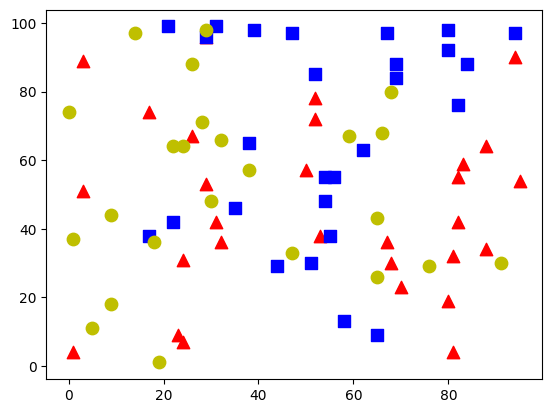

In [7]:
# matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, ...)
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')  # size 80, red, triangle
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')  # size 80, blue, square
plt.scatter(yellow[:, 0], yellow[:, 1], 80, 'y', 'o')  # size 80, yellow, circle
plt.show()


#Test Unknown Data

In [8]:
# create 1 * 2 or 1 (x,y) value with random integer 0-99
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
print(newcomer)


[[46. 24.]]


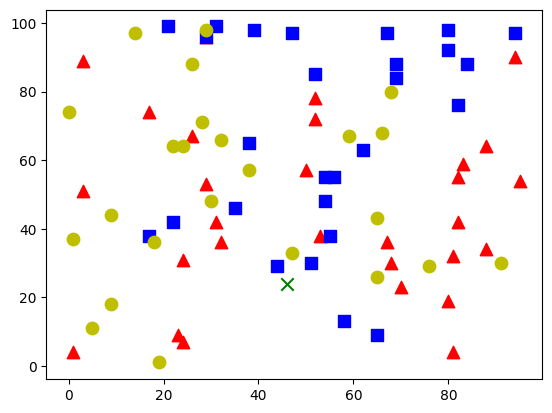

In [9]:
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')  # red, triangle
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')  # blue, square
plt.scatter(yellow[:, 0], yellow[:, 1], 80, 'y', 'o')  # yellow, circle
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'x')  # green, cross
plt.show()


In [10]:
colorName = np.array(['Red', 'Blue', 'Yellow'])


In [11]:
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
k = 4
ret, results, neighbors, dist = knn.findNearest(newcomer, k)


In [12]:
resultColor = colorName[results[0].astype(int)]
neighborColors = colorName[neighbors[0].astype(int)]


In [13]:
print("result color:  {}\n".format(resultColor))
print("neighbors:  {}\n".format(neighbors))
print("neighbor colors:  {}\n".format(neighborColors))
print("neighbor distances:  {}\n".format(dist[0]))


result color:  ['Blue']

neighbors:  [[1. 1. 2. 0.]]

neighbor colors:  ['Blue' 'Blue' 'Yellow' 'Red']

neighbor distances:  [ 29.  61.  82. 245.]

